##Car Brand Prediction

## Transfer Learning ResNet50 using Keras

##Reference:
###1. Stackoverflow
###2. YouTube

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [ ]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 4s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# tell the model what optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 10s 5s/step - loss: 6.4182 - accuracy: 0.2969 - val_loss: 6.8535 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 9s 5s/step - loss: 6.9648 - accuracy: 0.3281 - val_loss: 1.7093 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 9s 5s/step - loss: 3.2817 - accuracy: 0.3906 - val_loss: 6.9409 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 9s 5s/step - loss: 5.5726 - accuracy: 0.3906 - val_loss: 1.2257 - val_accuracy: 0.4828
Epoch 5/50
2/2 [==============================] - 9s 5s/step - loss: 1.6412 - accuracy: 0.5156 - val_loss: 3.5566 - val_accuracy: 0.4483
Epoch 6/50
2/2 [==============================] - 9s 5s/step - loss: 3.5139 - accuracy: 0.5469 - val_loss: 3.7291 - val_accuracy: 0.5345
Epoch 7/50
2/2 [==============================] - 9s 5s/step - loss: 3.0534 - accuracy: 0.5938 - val_

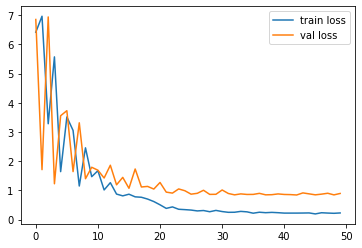

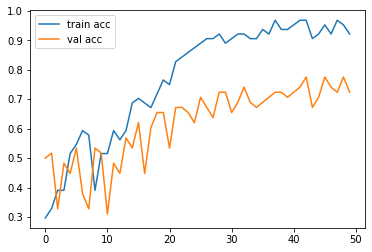

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[2.30384828e-03, 5.41915059e-01, 4.55781102e-01],
       [7.72820413e-01, 1.64204329e-01, 6.29752204e-02],
       [4.14448464e-03, 9.85642850e-01, 1.02127194e-02],
       [9.32210311e-02, 9.48940068e-02, 8.11884940e-01],
       [7.24451989e-02, 6.41176760e-01, 2.86377996e-01],
       [8.40498507e-02, 7.51882315e-01, 1.64067909e-01],
       [8.68977189e-01, 1.25839144e-01, 5.18365717e-03],
       [1.48623556e-01, 7.27487803e-02, 7.78627634e-01],
       [7.77774900e-02, 1.02909785e-02, 9.11931515e-01],
       [7.11336374e-01, 7.43777584e-03, 2.81225860e-01],
       [9.76465940e-01, 9.85114183e-03, 1.36829764e-02],
       [2.53591295e-02, 6.46818459e-01, 3.27822447e-01],
       [7.48546571e-02, 6.69200420e-01, 2.55944997e-01],
       [3.13192122e-02, 5.51771581e-01, 4.16909158e-01],
       [2.96767280e-02, 9.69194710e-01, 1.12862233e-03],
       [4.53893468e-02, 5.31176245e-03, 9.49298918e-01],
       [9.40703750e-01, 2.87308041e-02, 3.05654630e-02],
       [2.82816291e-02, 8.55485

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
#0 = AUDI, 1 = LAMBORGHINI, 2 = MERCEDES
y_pred

array([1, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('Datasets/Test/lamborghini/1.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[ 70.,  75.,  81.],
        [ 48.,  53.,  59.],
        [135., 140., 144.],
        ...,
        [ 75.,  70.,  67.],
        [ 88.,  79.,  80.],
        [ 94.,  85.,  86.]],

       [[  2.,   7.,  13.],
        [  1.,   6.,  10.],
        [ 11.,  16.,  20.],
        ...,
        [ 71.,  66.,  63.],
        [ 87.,  78.,  79.],
        [ 89.,  80.,  81.]],

       [[ 34.,  39.,  43.],
        [ 68.,  73.,  77.],
        [ 16.,  21.,  25.],
        ...,
        [105., 100.,  97.],
        [ 72.,  63.,  64.],
        [ 75.,  66.,  67.]],

       ...,

       [[ 34.,  33.,  39.],
        [ 35.,  34.,  40.],
        [ 43.,  42.,  48.],
        ...,
        [200., 199., 205.],
        [144., 145., 150.],
        [123., 124., 129.]],

       [[ 32.,  31.,  37.],
        [ 34.,  33.,  39.],
        [ 44.,  43.,  49.],
        ...,
        [210., 209., 215.],
        [226., 227., 232.],
        [210., 211., 216.]],

       [[ 33.,  32.,  38.],
        [ 35.,  34.,  40.],
        [ 43.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255
x

array([[[0.27450982, 0.29411766, 0.31764707],
        [0.1882353 , 0.20784314, 0.23137255],
        [0.5294118 , 0.54901963, 0.5647059 ],
        ...,
        [0.29411766, 0.27450982, 0.2627451 ],
        [0.34509805, 0.30980393, 0.3137255 ],
        [0.36862746, 0.33333334, 0.3372549 ]],

       [[0.00784314, 0.02745098, 0.05098039],
        [0.00392157, 0.02352941, 0.03921569],
        [0.04313726, 0.0627451 , 0.07843138],
        ...,
        [0.2784314 , 0.25882354, 0.24705882],
        [0.34117648, 0.30588236, 0.30980393],
        [0.34901962, 0.3137255 , 0.31764707]],

       [[0.13333334, 0.15294118, 0.16862746],
        [0.26666668, 0.28627452, 0.3019608 ],
        [0.0627451 , 0.08235294, 0.09803922],
        ...,
        [0.4117647 , 0.39215687, 0.38039216],
        [0.28235295, 0.24705882, 0.2509804 ],
        [0.29411766, 0.25882354, 0.2627451 ]],

       ...,

       [[0.13333334, 0.12941177, 0.15294118],
        [0.13725491, 0.13333334, 0.15686275],
        [0.16862746, 0

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1.0172549e-02, 6.8453449e-04, 9.8914295e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a 

array([2])